# Student-Performance-Evaluation using Classification-Regression
___
Here we would try to predict student performance in secondary education (high school). 

We would perform data analysis for 3 cases :

[Case 1: Binary-Classification :-G3>10:-1-else-0](#CASE-1:-Binary-Classification-:-G3>10:-1-else-0)

[Case 2: Multi-Class-Classification](#CASE-2:-Multi-Class-Classification-:)

[Case 3: Regression](#Case-3-:-Regression)

#### Data Set Information:

This data approaches student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.

Dataset : http://archive.ics.uci.edu/ml/datasets/Student+Performance

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2. sex - student's sex (binary: 'F' - female or 'M' - male) 
3. age - student's age (numeric: from 15 to 22) 
4. address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - \>1 hour) 
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15. failures - number of past class failures (numeric: n if 1<=n\<3, else 4) 
16. schoolsup - extra educational support (binary: yes or no) 
17. famsup - family educational support (binary: yes or no) 
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19. activities - extra-curricular activities (binary: yes or no) 
20. nursery - attended nursery school (binary: yes or no) 
21. higher - wants to take higher education (binary: yes or no) 
22. internet - Internet access at home (binary: yes or no) 
23. romantic - with a romantic relationship (binary: yes or no) 
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29. health - current health status (numeric: from 1 - very bad to 5 - very good) 
30. absences - number of school absences (numeric: from 0 to 93) 

31. G1 - first period grade (numeric: from 0 to 20) 
31. G2 - second period grade (numeric: from 0 to 20) 
32. G3 - final grade (numeric: from 0 to 20, output target)

these grades are related with the course subject, Math or Portuguese: 


In [4]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [5]:
# read .csv from provided dataset
csv_filename="student/student-mat.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, sep=";")

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# CASE 1: Binary Classification : G3>10: 1 else 0

In [8]:
df.G3.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [9]:
# handle G3 attrubte to binary
high = df.G3 >= 10
low = df.G3 < 10
df.loc[high,'G3'] = 1
df.loc[low,'G3'] = 0

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,1


In [11]:
df.G3.describe()

count    395.000000
mean       0.670886
std        0.470487
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: G3, dtype: float64

In [12]:
cols = list(df.columns)

In [13]:
categorical_features = []
for f in cols:
    if df[f].dtype != 'int64':
        categorical_features.append(f)
categorical_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [14]:
for f in categorical_features:

    #Get binarized columns
    df[f] = pd.get_dummies(df[f])

In [15]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,0,1,1,4,4,1,0,...,4,3,4,1,1,3,6,5,6,0
1,1,1,17,0,1,0,1,1,1,0,...,5,3,3,1,1,3,4,5,5,0
2,1,1,15,0,0,0,1,1,1,0,...,4,3,2,2,3,3,10,7,8,1
3,1,1,15,0,1,0,4,2,0,0,...,3,2,2,1,1,5,2,15,14,1
4,1,1,16,0,1,0,3,3,0,0,...,4,3,2,1,2,5,4,6,10,1


In [16]:
features=list(df.columns[:-1])

In [17]:
X = df[features]
y = df['G3']

In [18]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.4, random_state=0)

In [20]:
print (X_train.shape, y_train.shape)

(237, 32) (237,)


### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 31 - G2 (0.240635) 
2. feature 30 - G1 (0.180379) 
3. feature 14 - failures (0.058718) 
4. feature 29 - absences (0.032248) 
5. feature 25 - goout (0.031282) 
6. feature 2 - age (0.031181) 
7. feature 6 - Medu (0.023217) 
8. feature 7 - Fedu (0.023036) 
9. feature 28 - health (0.022799) 
10. feature 13 - studytime (0.022735) 
11. feature 23 - famrel (0.021943) 
12. feature 24 - freetime (0.021443) 
13. feature 27 - Walc (0.020626) 
14. feature 15 - schoolsup (0.018678) 
15. feature 22 - romantic (0.017761) 
16. feature 10 - reason (0.016906) 
17. feature 18 - activities (0.016887) 
18. feature 26 - Dalc (0.016689) 
19. feature 3 - address (0.016217) 
20. feature 1 - sex (0.016042) 
21. feature 12 - traveltime (0.015887) 
22. feature 4 - famsize (0.015885) 
23. feature 17 - paid (0.015443) 
24. feature 16 - famsup (0.014640) 
25. feature 11 - guardian (0.014492) 
26. feature 21 - internet (0.013992) 
27. feature 8 - Mjob (0.013320) 
28. feature 19 - nursery (

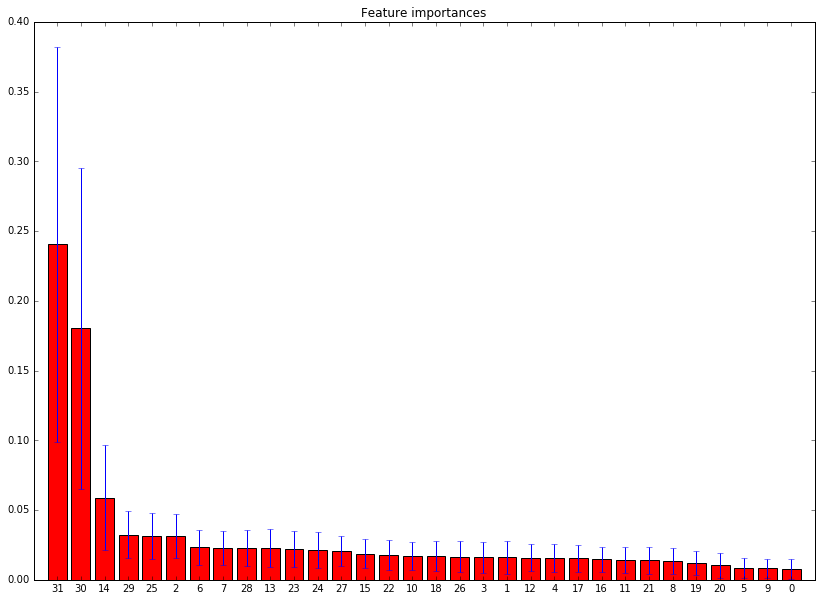

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [30]:
importances[indices[:5]]

array([ 0.24063511,  0.18037904,  0.05871839,  0.03224845,  0.03128223])

In [31]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 31 - G2 (0.240635)
2. feature 30 - G1 (0.180379)
3. feature 14 - failures (0.058718)
4. feature 29 - absences (0.032248)
5. feature 25 - goout (0.031282)


In [32]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

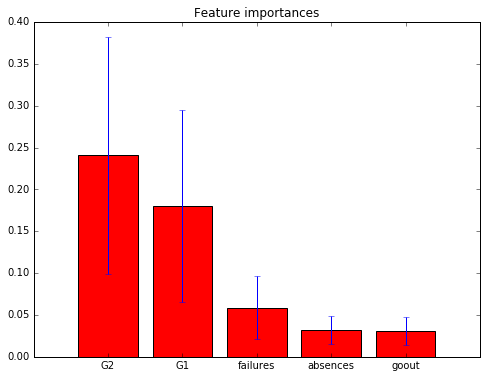

In [34]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

# Decision Tree accuracy and time elapsed caculation

In [21]:
t0=time()
print ("DecisionTree")

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print ("Acurracy: ", clf_dt.score(X_test,y_test))
t1=time()
print ("time elapsed: ", t1-t0)

DecisionTree
Acurracy:  0.886075949367
time elapsed:  0.007000446319580078


## cross validation for DT

In [22]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(dt, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.89873418  0.86075949  0.84810127  0.82278481  0.86075949]
0.858227848101
time elapsed:  0.039002180099487305


### Tuning our hyperparameters using GridSearch

In [38]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)

print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   20.2s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.933
Best parameters set:
	clf__max_depth: 50
	clf__min_samples_leaf: 2
	clf__min_samples_split: 5
             precision    recall  f1-score   support

          0       0.90      0.73      0.80        59
          1       0.85      0.95      0.90        99

avg / total       0.87      0.87      0.86       158



# Random Forest accuracy and time elapsed caculation

In [23]:
t2=time()
print ("RandomForest")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print ("Acurracy: ", clf_rf.score(X_test,y_test))
t3=time()
print ("time elapsed: ", t3-t2)

RandomForest
Acurracy:  0.917721518987
time elapsed:  0.5780332088470459


## cross validation for RF

In [24]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(rf, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.88607595  0.93670886  0.84810127  0.88607595  0.92405063]
0.896202531646
time elapsed:  2.511143684387207


### Receiver Operating Characteristic (ROC) curve

In [25]:
roc_auc_score(y_test,rf.predict(X_test))

0.90010272213662046

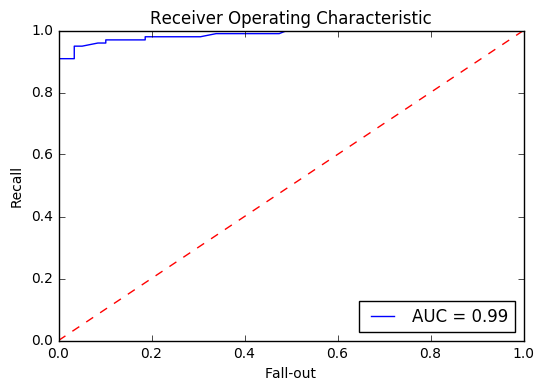

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions = rf.predict_proba(X_test)

false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

### Tuning Models using GridSearch

In [43]:

pipeline2 = Pipeline([
('clf', RandomForestClassifier(criterion='entropy'))
])

parameters = {
    'clf__n_estimators': (5, 25, 50, 100),
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)
print classification_report(y_test, predictions)
    

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   58.4s finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best score: 0.916
Best parameters set:
	clf__max_depth: 5
	clf__min_samples_leaf: 3
	clf__min_samples_split: 1
	clf__n_estimators: 50
Accuracy: 0.905063291139
             precision    recall  f1-score   support

          0       0.94      0.80      0.86        59
          1       0.89      0.97      0.93        99

avg / total       0.91      0.91      0.90       158



# Naive Bayes accuracy and time elapsed caculation


In [27]:
t4=time()
print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))
t5=time()
print ("time elapsed: ", t5-t4)

NaiveBayes
Acurracy:  0.70253164557
time elapsed:  0.2800161838531494


## cross-validation for NB

In [28]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(nb, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.67088608  0.83544304  0.67088608  0.72151899  0.65822785]
0.711392405063
time elapsed:  0.04200243949890137


# KNN accuracy and time elapsed caculation

In [30]:
t6=time()
print ("KNN")
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier()
clf_knn=knn.fit(X_train, y_train)
print ("Acurracy: ", clf_knn.score(X_test,y_test) )
t7=time()
print ("time elapsed: ", t7-t6)

KNN
Acurracy:  0.892405063291
time elapsed:  0.008000373840332031


## cross validation for KNN

In [31]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(knn, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.83544304  0.87341772  0.88607595  0.92405063  0.87341772]
0.878481012658
time elapsed:  0.04500269889831543


# SVM accuracy and time elapsed caculation

In [32]:
t7=time()
print ("SVM")

svc = SVC()
clf_svc=svc.fit(X_train, y_train)
print ("Acurracy: ", clf_svc.score(X_test,y_test) )
t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy:  0.867088607595
time elapsed:  0.012000799179077148


## cross validation for SVM

In [33]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(svc, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.87341772  0.88607595  0.89873418  0.91139241  0.88607595]
0.891139240506
time elapsed:  0.09800553321838379


In [50]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = grid_search.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score: 0.907
Best parameters set:
	C: 10
	kernel: 'rbf'
             precision    recall  f1-score   support

          0       0.92      0.76      0.83        59
          1       0.87      0.96      0.91        99

avg / total       0.89      0.89      0.88       158



[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   18.2s finished


In [51]:
pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)
print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   20.2s finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score: 0.907
Best parameters set:
	clf__C: 3
	clf__gamma: 0.01
             precision    recall  f1-score   support

          0       0.92      0.83      0.88        59
          1       0.90      0.96      0.93        99

avg / total       0.91      0.91      0.91       158



___

In [34]:
# read .csv from provided dataset
csv_filename="student/student-mat.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, sep=";")

In [35]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [36]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# CASE 2: Multi Class Classification : 
<table>
<tr>
<th>Class</th><th>G3</th><th>Label</th>   
</tr>
<tr>
<td>I   (excellent/very good)</td><td>16-20</td><td>A</td>
</tr>
<tr>
<td>II  (good)</td><td>14-15</td><td>B</td>
</tr>
<tr>
<td>III (satisfactory)</td><td>12-13</td><td>C</td> 
</tr>
<tr>
<td>IV  (sufficient)</td><td>10-11</td><td>D</td>
</tr>
<tr>
<td>V   (fail)</td><td>0-9</td><td>E</td>         
</tr>

In [37]:
df.G3.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [38]:
for i in range(len(df.G3)):
    if df.G3.loc[i] < 10:
        df.G3.loc[i] = 5
    elif df.G3.loc[i] < 12:
        df.G3.loc[i] = 4
    elif df.G3.loc[i] < 14:
        df.G3.loc[i] = 3
    elif df.G3.loc[i] < 16:
        df.G3.loc[i] = 2
    elif df.G3.loc[i] < 21:
        df.G3.loc[i] = 1

In [39]:
df.G3.unique()

array([5, 4, 2, 1, 3], dtype=int64)

In [40]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,4
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,4


In [41]:
df.G3.describe()

count    395.000000
mean       3.564557
std        1.349096
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: G3, dtype: float64

In [42]:
cols = list(df.columns)

In [43]:
categorical_features = []
for f in cols:
    if df[f].dtype != 'int64':
        categorical_features.append(f)
categorical_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [44]:
for f in categorical_features:

    #Get binarized columns
    df[f] = pd.get_dummies(df[f])

In [45]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,0,1,1,4,4,1,0,...,4,3,4,1,1,3,6,5,6,5
1,1,1,17,0,1,0,1,1,1,0,...,5,3,3,1,1,3,4,5,5,5
2,1,1,15,0,0,0,1,1,1,0,...,4,3,2,2,3,3,10,7,8,4
3,1,1,15,0,1,0,4,2,0,0,...,3,2,2,1,1,5,2,15,14,2
4,1,1,16,0,1,0,3,3,0,0,...,4,3,2,1,2,5,4,6,10,4


In [46]:
features=list(df.columns[:-1])

In [47]:
X = df[features]
y = df['G3']

In [48]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.4, random_state=0)

In [49]:
print (X_train.shape, y_train.shape)

(237, 32) (237,)


### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 31 - G2 (0.195782) 
2. feature 30 - G1 (0.145836) 
3. feature 29 - absences (0.035497) 
4. feature 25 - goout (0.032551) 
5. feature 2 - age (0.032141) 
6. feature 6 - Medu (0.031506) 
7. feature 28 - health (0.030933) 
8. feature 24 - freetime (0.029983) 
9. feature 27 - Walc (0.029495) 
10. feature 13 - studytime (0.029247) 
11. feature 23 - famrel (0.029207) 
12. feature 14 - failures (0.028804) 
13. feature 7 - Fedu (0.028431) 
14. feature 12 - traveltime (0.022976) 
15. feature 26 - Dalc (0.022761) 
16. feature 18 - activities (0.021505) 
17. feature 1 - sex (0.021448) 
18. feature 16 - famsup (0.021390) 
19. feature 17 - paid (0.020667) 
20. feature 10 - reason (0.020605) 
21. feature 4 - famsize (0.020506) 
22. feature 22 - romantic (0.019582) 
23. feature 19 - nursery (0.018253) 
24. feature 11 - guardian (0.017402) 
25. feature 3 - address (0.016361) 
26. feature 15 - schoolsup (0.014624) 
27. feature 21 - internet (0.014290) 
28. feature 5 - Pstatu

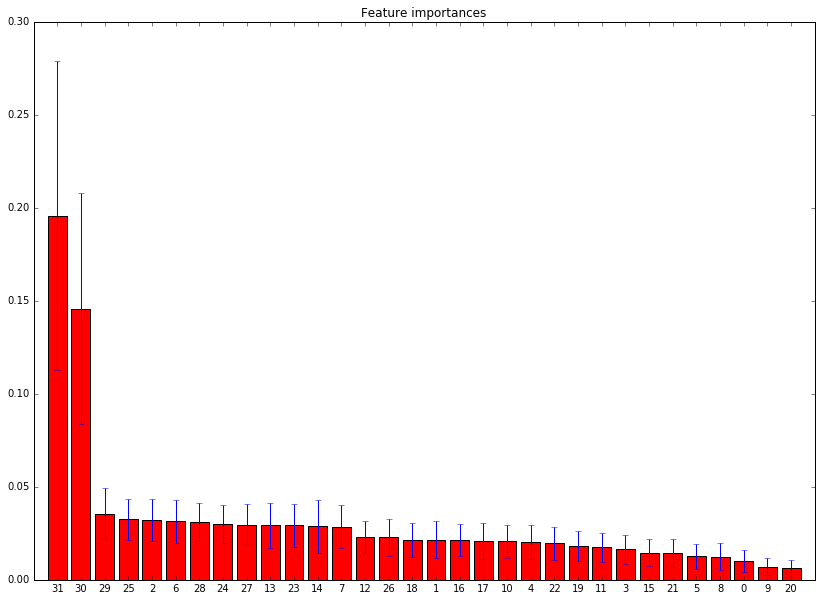

In [116]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [117]:
importances[indices[:5]]

array([ 0.19578233,  0.14583578,  0.03549731,  0.03255128,  0.03214145])

In [118]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 31 - G2 (0.195782)
2. feature 30 - G1 (0.145836)
3. feature 29 - absences (0.035497)
4. feature 25 - goout (0.032551)
5. feature 2 - age (0.032141)


In [119]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

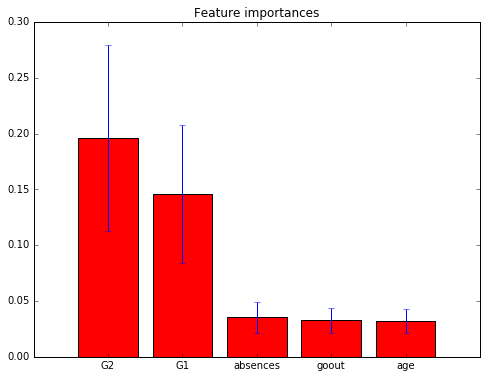

In [120]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

# Decision Tree accuracy and time elapsed caculation

In [50]:
t0=time()
print ("DecisionTree")

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print ("Acurracy: ", clf_dt.score(X_test,y_test))
t1=time()
print ("time elapsed: ", t1-t0)

DecisionTree
Acurracy:  0.708860759494
time elapsed:  0.0060002803802490234


## cross validation for DT

In [52]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(dt, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.725       0.7625      0.64556962  0.56410256  0.66666667]
0.672767770204
time elapsed:  0.049002885818481445


### Tuning our hyperparameters using GridSearch

In [123]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_
print 'Best parameters set:'

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)

print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   23.2s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.718
Best parameters set:
	clf__max_depth: 50
	clf__min_samples_leaf: 3
	clf__min_samples_split: 10
             precision    recall  f1-score   support

          1       0.75      0.94      0.83        16
          2       0.68      0.71      0.69        24
          3       0.65      0.46      0.54        24
          4       0.56      0.71      0.63        35
          5       0.90      0.78      0.84        59

avg / total       0.74      0.72      0.72       158



# Random Forest accuracy and time elapsed caculation

In [56]:
t2=time()
print ("RandomForest")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print ("Acurracy: ", clf_rf.score(X_test,y_test))
t3=time()
print ("time elapsed: ", t3-t2)

RandomForest
Acurracy:  0.670886075949
time elapsed:  0.5430312156677246


## cross validation for RF

In [57]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(rf, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.65        0.6875      0.67088608  0.71794872  0.74358974]
0.693984907498
time elapsed:  2.495142698287964


### Tuning Models using GridSearch

In [127]:

pipeline2 = Pipeline([
('clf', RandomForestClassifier(criterion='entropy'))
])

parameters = {
    'clf__n_estimators': (5, 25, 50, 100),
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (1, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])

predictions = grid_search.predict(X_test)
print 'Accuracy:', accuracy_score(y_test, predictions)
print classification_report(y_test, predictions)
    

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.1min finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best score: 0.713
Best parameters set:
	clf__max_depth: 50
	clf__min_samples_leaf: 3
	clf__min_samples_split: 5
	clf__n_estimators: 100
Accuracy: 0.753164556962
             precision    recall  f1-score   support

          1       0.80      0.50      0.62        16
          2       0.61      0.83      0.70        24
          3       0.65      0.46      0.54        24
          4       0.67      0.74      0.70        35
          5       0.92      0.92      0.92        59

avg / total       0.76      0.75      0.75       158



# Naive Bayes accuracy and time elapsed caculation


In [59]:
t4=time()
print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))
t5=time()
print ("time elapsed: ", t5-t4)

NaiveBayes
Acurracy:  0.379746835443
time elapsed:  0.0370020866394043


## cross-validation for NB

In [60]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(nb, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.3125      0.375       0.27848101  0.41025641  0.35897436]
0.347042356378
time elapsed:  0.0740041732788086


# KNN accuracy and time elapsed caculation

In [61]:
t6=time()
print ("KNN")
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier()
clf_knn=knn.fit(X_train, y_train)
print ("Acurracy: ", clf_knn.score(X_test,y_test) )
t7=time()
print ("time elapsed: ", t7-t6)

KNN
Acurracy:  0.626582278481
time elapsed:  0.01500082015991211


## cross validation for KNN

In [62]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(knn, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.6125      0.6625      0.64556962  0.64102564  0.66666667]
0.645652385589
time elapsed:  0.05500316619873047


# SVM accuracy and time elapsed caculation

In [63]:
t7=time()
print ("SVM")

svc = SVC()
clf_svc=svc.fit(X_train, y_train)
print ("Acurracy: ", clf_svc.score(X_test,y_test) )
t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy:  0.721518987342
time elapsed:  0.017000913619995117


## cross validation for SVM

In [64]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(svc, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.6375      0.7         0.69620253  0.73076923  0.78205128]
0.709304608893
time elapsed:  0.128007173538208


In [134]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = grid_search.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print 'Best score: %0.3f' % grid.best_score_

print 'Best parameters set:'
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid.predict(X_test)
print classification_report(y_test, predictions)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score: 0.679
Best parameters set:
	C: 1
	kernel: 'linear'
             precision    recall  f1-score   support

          1       0.67      0.62      0.65        16
          2       0.59      0.54      0.57        24
          3       0.52      0.62      0.57        24
          4       0.67      0.63      0.65        35
          5       0.92      0.92      0.92        59

avg / total       0.73      0.72      0.72       158



[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.0s finished


In [135]:
pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print 'Best score: %0.3f' % grid_search.best_score_

print 'Best parameters set:'
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print '\t%s: %r' % (param_name, best_parameters[param_name])
    
predictions = grid_search.predict(X_test)
print classification_report(y_test, predictions)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   19.8s finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score: 0.700
Best parameters set:
	clf__C: 3
	clf__gamma: 0.01
             precision    recall  f1-score   support

          1       0.79      0.69      0.73        16
          2       0.73      0.79      0.76        24
          3       0.62      0.67      0.64        24
          4       0.61      0.66      0.63        35
          5       0.93      0.85      0.88        59

avg / total       0.76      0.75      0.76       158



___
# Case 3 : Regression

In [149]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split
from sklearn. cross_validation import cross_val_score

from sklearn.feature_selection import *
from sklearn import metrics

In [136]:
# read .csv from provided dataset
csv_filename="student/student-mat.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename,sep=";")

In [137]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [141]:
cols = list(df.columns)

In [143]:
categorical_features = []
for f in cols:
    if df[f].dtype != 'int64':
        categorical_features.append(f)
categorical_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [144]:
for f in categorical_features:

    #Get binarized columns
    df[f] = pd.get_dummies(df[f])

In [155]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,1.0,18,0.0,1.0,1.0,4,4,1.0,0.0,...,4,3,4,1,1,3,6,5,6,6
1,1.0,1.0,17,0.0,1.0,0.0,1,1,1.0,0.0,...,5,3,3,1,1,3,4,5,5,6
2,1.0,1.0,15,0.0,0.0,0.0,1,1,1.0,0.0,...,4,3,2,2,3,3,10,7,8,10
3,1.0,1.0,15,0.0,1.0,0.0,4,2,0.0,0.0,...,3,2,2,1,1,5,2,15,14,15
4,1.0,1.0,16,0.0,1.0,0.0,3,3,0.0,0.0,...,4,3,2,1,2,5,4,6,10,10


In [156]:
features=list(df.columns[:-1])

In [157]:
X = df[features]
y = df['G3']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

[(False, 'school'), (False, 'sex'), (False, 'age'), (False, 'address'), (False, 'famsize'), (False, 'Pstatus'), (True, 'Medu'), (True, 'Fedu'), (False, 'Mjob'), (False, 'Fjob'), (False, 'reason'), (False, 'guardian'), (False, 'traveltime'), (False, 'studytime'), (True, 'failures'), (False, 'schoolsup'), (False, 'famsup'), (False, 'paid'), (False, 'activities'), (False, 'nursery'), (False, 'higher'), (False, 'internet'), (False, 'romantic'), (False, 'famrel'), (False, 'freetime'), (False, 'goout'), (False, 'Dalc'), (False, 'Walc'), (False, 'health'), (False, 'absences'), (True, 'G1'), (True, 'G2')]


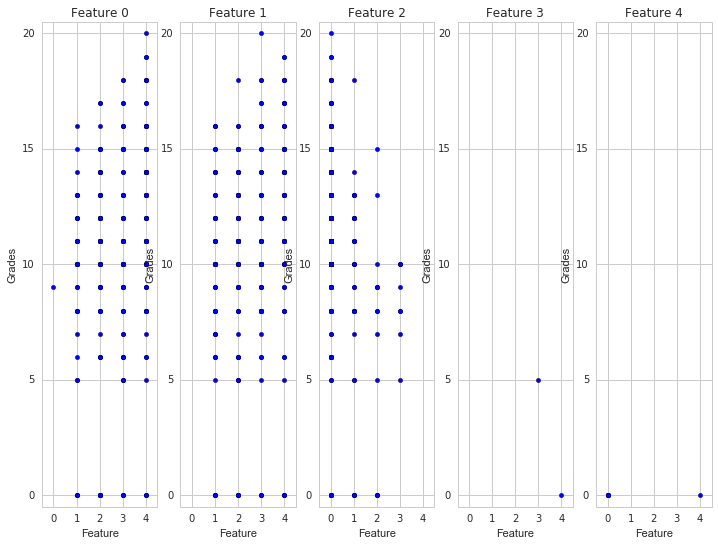

In [169]:
from sklearn.feature_selection import *
fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train,y_train)
z =  zip(fs.get_support(),features)
print z

x_min, x_max = X_new[:,0].min() - .5, X_new[:, 0].max() + .5
y_min, y_max = y_train.min() - .5, y_train.max() + .5
#fig=plt.figure()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,5)
fig.set_size_inches(12,12)

for i in range(5):
    axes[i].set_aspect('equal')
    axes[i].set_title('Feature {}'.format(i))
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Grades')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_new[:,i],y_train)


In [172]:
best_features = []
for bool,feature in z:
    if bool:
        best_features.append(feature)

In [176]:
correlated = best_features + ['G3']

In [177]:
correlated

['Medu', 'Fedu', 'failures', 'G1', 'G2', 'G3']

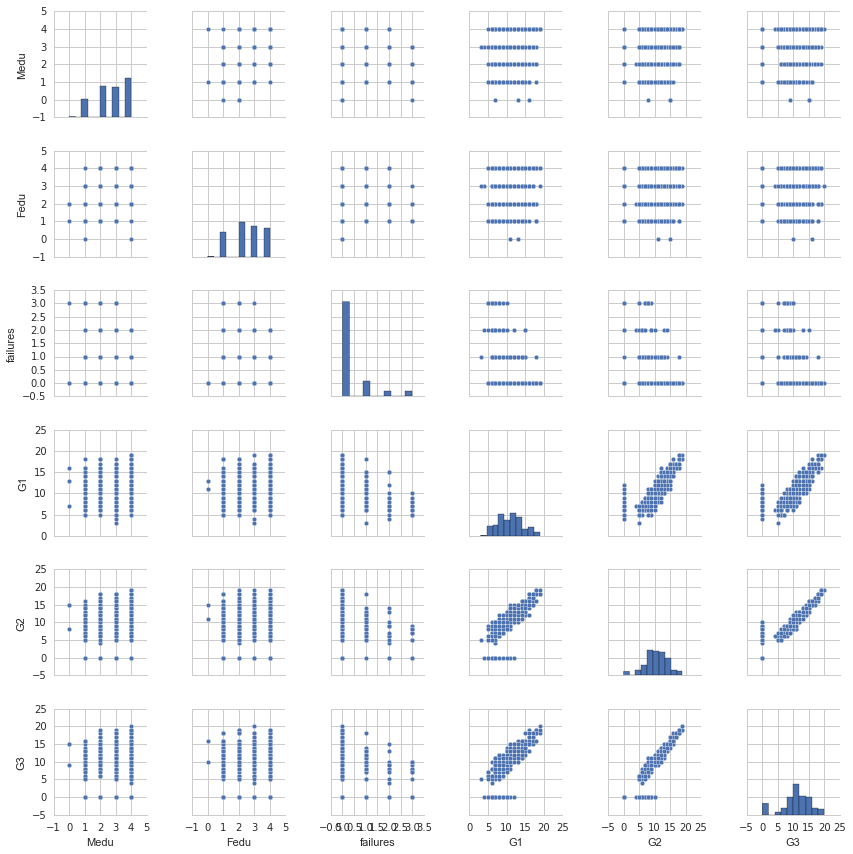

In [179]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

sns.pairplot(df[correlated], size=2.0);
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

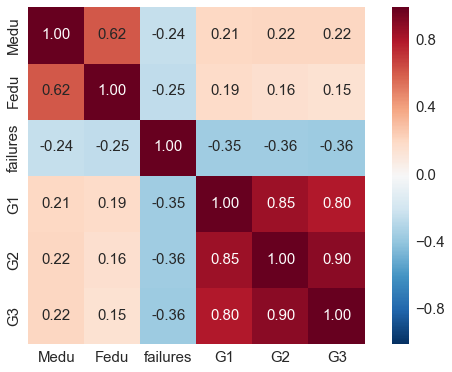

In [181]:
import numpy as np
cm = np.corrcoef(df[correlated].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=correlated,
            xticklabels=correlated)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

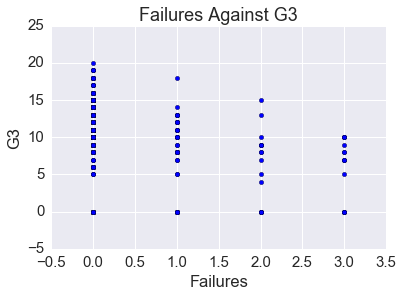

In [182]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['failures'], df['G3'])
plt.xlabel('Failures')
plt.ylabel('G3')
plt.title('Failures Against G3')
plt.show()

In [196]:
from sklearn.cross_validation import train_test_split

X = df[features].values
y = df['G3'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [185]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

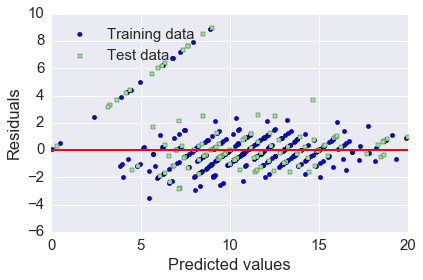

In [187]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=20, lw=2, color='red')
plt.xlim([0, 20])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [188]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2.486, test: 5.642
R^2 train: 0.859, test: 0.798


## Using regularized methods for regression

A Lasso Regression model can be initialized as follows:

In [189]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.         -0.         -0.14097623 -0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.         -0.
  0.          0.          0.02030755  0.          0.         -0.
  0.05042061  0.01666828  0.03440757  0.09543018  0.98554785]


In [190]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2.666, test: 5.868
R^2 train: 0.849, test: 0.790


Similiarly Ridge regression can be used:

In [191]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

[-0.35325243 -0.20836897 -0.21409541 -0.14297151 -0.09381759  0.27131556
  0.17368312 -0.12499116  0.21471346  0.15413121 -0.01400552  0.18185536
  0.06190845  0.07503396  0.00234185 -0.44425912 -0.13290367 -0.10680339
  0.30051497  0.32123389 -0.23413804  0.20521655  0.25409234  0.15749261
  0.02279431  0.00097435 -0.19989632  0.1902062   0.07026242  0.04768856
  0.13956252  0.95878554]


Lastly, the ElasticNet implementation allows us to vary the L1 to L2 ratio:

In [192]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=1.0, l1_ratio=0.5)
en.fit(X_train, y_train)
y_train_pred = en.predict(X_train)
y_test_pred = en.predict(X_test)
print(en.coef_)

[ 0.         -0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.         -0.
 -0.          0.          0.          0.          0.         -0.          0.
  0.          0.01991938  0.13861396  0.89133515]


For example, if we set l1_ratio to 1.0, the ElasticNet regressor would be
equal to LASSO regression.

## Decision tree regression

In [201]:
X = df[features].values
y = df['G3'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [202]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2.519, test: 4.577
R^2 train: 0.857, test: 0.836


## Random forest regression

In [204]:
X = df[features].values
y = df['G3'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [205]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.250, test: 3.806
R^2 train: 0.986, test: 0.864


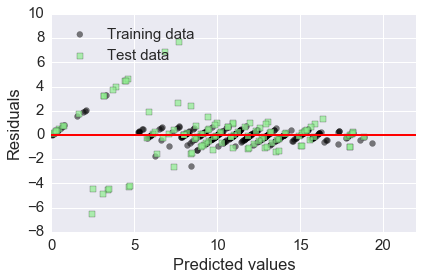

In [206]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=22, lw=2, color='red')
plt.xlim([0, 22])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

___

# Linear Regression

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print 'R-squared:', regressor.score(X_test, y_test)

R-squared: 0.780914360184


### Cross Validation

In [208]:
scores = cross_val_score(regressor, X, y, cv=5)
print "Average of scores: ", scores.mean()
print "Cross validation scores: ", scores

Average of scores:  0.794475403313
Cross validation scores:  [ 0.81813068  0.88591594  0.77938816  0.78516026  0.70378198]


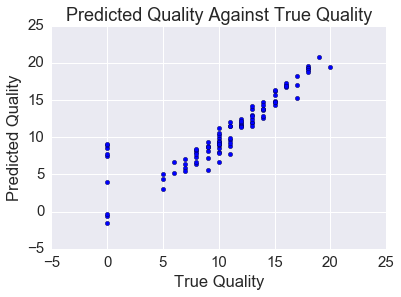

In [209]:
plt.scatter(y_test,y_predictions)
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality')
plt.show()

## Fitting models with gradient descent

# SGDRegressor

In [210]:
# Scaling the features using StandardScaler:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

C:\Miniconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Miniconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Miniconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data h

In [211]:
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print 'Cross validation r-squared scores:', scores
print 'Average cross validation r-squared score:', np.mean(scores)
regressor.fit_transform(X_train, y_train)
print 'Test set r-squared score', regressor.score(X_test, y_test)

Cross validation r-squared scores: [ 0.75096581  0.86510753  0.76876374  0.7369485   0.7987154 ]
Average cross validation r-squared score: 0.784100195438
Test set r-squared score 0.773056308523


C:\Miniconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [213]:
from sklearn.cross_validation import *
def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print "Coefficient of determination on training set:",clf.score(X_train, y_train)
    
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print "Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores)

# Support Vector Machines for regression
The regression version of SVM can be used instead to find the hyperplane (note how easy is to change the classification method in scikit-learn!). We will try a linear kernel, a polynomial kernel, and finally, a rbf kernel. For more information on kernels, see http://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [217]:
from sklearn import svm
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,X_train,y_train)

Coefficient of determination on training set: 0.849157093784
Average coefficient of determination using 5-fold crossvalidation: 0.842490490255


In [218]:
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,y_train)

Coefficient of determination on training set: 0.991247519011
Average coefficient of determination using 5-fold crossvalidation: -92.8405695274


In [219]:
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,y_train)

Coefficient of determination on training set: 0.76854274345
Average coefficient of determination using 5-fold crossvalidation: 0.637749259288


In [220]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,y_train)

Coefficient of determination on training set: 0.875086659141
Average coefficient of determination using 5-fold crossvalidation: 0.577096119973


# Random Forests for Regression
Finally, let's try again Random Forests, in their Extra Trees, and Regression version

In [221]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.834438823442


An interesting side effect of random forest classification, is that you can measure how 'important' each feature is when predicting the final result

In [222]:
print np.sort(zip(clf_et.feature_importances_,features),axis=0)

[['0.000414630355532' 'Dalc']
 ['0.000514007655848' 'Fedu']
 ['0.000616839340144' 'Fjob']
 ['0.000812859348316' 'G1']
 ['0.000894604750305' 'G2']
 ['0.000964541098088' 'Medu']
 ['0.0018054901535' 'Mjob']
 ['0.00181670492675' 'Pstatus']
 ['0.00185431089792' 'Walc']
 ['0.00216206896705' 'absences']
 ['0.00220641658743' 'activities']
 ['0.00239183938313' 'address']
 ['0.0024096646334' 'age']
 ['0.00249476017392' 'failures']
 ['0.00250597775474' 'famrel']
 ['0.00255391358532' 'famsize']
 ['0.00279086333248' 'famsup']
 ['0.0031383209147' 'freetime']
 ['0.00360150739838' 'goout']
 ['0.00431525126952' 'guardian']
 ['0.00445755164541' 'health']
 ['0.0048610587442' 'higher']
 ['0.00532054800371' 'internet']
 ['0.00710396827835' 'nursery']
 ['0.00841846425943' 'paid']
 ['0.00925093324961' 'reason']
 ['0.00956984349144' 'romantic']
 ['0.0100368287457' 'school']
 ['0.0144620072805' 'schoolsup']
 ['0.0435626263148' 'sex']
 ['0.330796342132' 'studytime']
 ['0.511895255329' 'traveltime']]


Finally, evaluate our classifiers on the testing set

In [223]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True,
                        show_classification_report=True,
                        show_confusion_matrix=True,
                        show_r2_score=False):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print "Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n"

    if show_classification_report:
        print "Classification report"
        print metrics.classification_report(y,y_pred),"\n"
        
    if show_confusion_matrix:
        print "Confusion matrix"
        print metrics.confusion_matrix(y,y_pred),"\n"
        
    if show_r2_score:
        print "Coefficient of determination:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n"

        
measure_performance(X_test,y_test,clf_et,
                    show_accuracy=False,
                    show_classification_report=False,
                    show_confusion_matrix=False,
                    show_r2_score=True)

Coefficient of determination:0.766 



___